In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d ashkhagan/figshare-brain-tumor-dataset

100% 837M/839M [00:48<00:00, 20.6MB/s]
100% 839M/839M [00:48<00:00, 18.0MB/s]


In [3]:
! unzip figshare-brain-tumor-dataset.zip

Archive:  figshare-brain-tumor-dataset.zip
  inflating: dataset/README.txt      
  inflating: dataset/cvind.mat       
  inflating: dataset/data/1.mat      
  inflating: dataset/data/10.mat     
  inflating: dataset/data/100.mat    
  inflating: dataset/data/1000.mat   
  inflating: dataset/data/1001.mat   
  inflating: dataset/data/1002.mat   
  inflating: dataset/data/1003.mat   
  inflating: dataset/data/1004.mat   
  inflating: dataset/data/1005.mat   
  inflating: dataset/data/1006.mat   
  inflating: dataset/data/1007.mat   
  inflating: dataset/data/1008.mat   
  inflating: dataset/data/1009.mat   
  inflating: dataset/data/101.mat    
  inflating: dataset/data/1010.mat   
  inflating: dataset/data/1011.mat   
  inflating: dataset/data/1012.mat   
  inflating: dataset/data/1013.mat   
  inflating: dataset/data/1014.mat   
  inflating: dataset/data/1015.mat   
  inflating: dataset/data/1016.mat   
  inflating: dataset/data/1017.mat   
  inflating: dataset/data/1018.mat   
  infla

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input,Concatenate
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
import cv2
from tensorflow import keras

In [5]:
datadir="/content/dataset/data"
N=3064
traindata=[]

for i in range(1,N+1):
    filename=str(i)+".mat"
    data=h5py.File(os.path.join(datadir,filename),"r")
    traindata.append(data)

    if i%100==0:
      print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [6]:
import random

random.shuffle(traindata)

In [7]:
train_images = []
train_labels = []
test_images = []
test_labels = []
temp=round(4*3064/5)

for i in range(temp):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    train_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    train_labels.append(label)

for i in range(temp,3064):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    test_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    test_labels.append(label) 

In [8]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
image_size = [512,512]

In [10]:
img_input = Input(shape=(512,512,1))
img_conc = Concatenate()([img_input, img_input, img_input])  

In [11]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor = img_conc)

for layer in base_model.layers:
    layer.trainable = False
    
X = base_model.output
X = layers.Flatten()(X)

X = layers.Dense(128)(X)
X = layers.Dropout(0.2)(X)
X = layers.BatchNormalization()(X)
X = Activation('relu')(X)

output = layers.Dense(3, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

9406464/9406464 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 512, 512, 3)  0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 Conv1 (Conv2D)                 (None, 256, 256, 32  864         ['concatenate[0][0]']        

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
r = model.fit(train_images,train_labels,epochs=10,batch_size=32,shuffle = False)

Epoch 1/10
77/77 [==============================] - 29s 187ms/step - loss: 0.3524 - accuracy: 0.8663
Epoch 2/10
77/77 [==============================] - 14s 182ms/step - loss: 0.1639 - accuracy: 0.9430
Epoch 3/10
77/77 [==============================] - 14s 182ms/step - loss: 0.0888 - accuracy: 0.9721
Epoch 4/10
77/77 [==============================] - 14s 183ms/step - loss: 0.0385 - accuracy: 0.9938
Epoch 5/10
77/77 [==============================] - 14s 182ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 6/10
77/77 [==============================] - 14s 182ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 7/10
77/77 [==============================] - 14s 183ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 8/10
77/77 [==============================] - 14s 181ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/10
77/77 [==============================] - 14s 182ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
77/77 [==============================] - 14s 182ms/step - loss: 0.0015 - accura

In [15]:
result=model.evaluate(test_images,test_labels)
print(result)

20/20 [==============================] - 5s 188ms/step - loss: 0.0629 - accuracy: 0.9738
[0.0628645271062851, 0.9738134145736694]


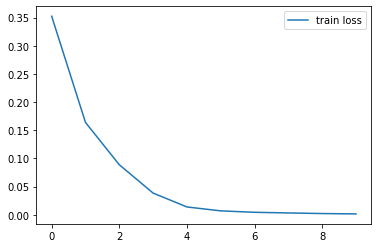

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGGnet')

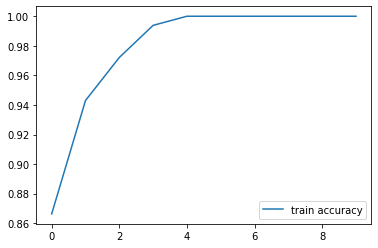

In [17]:
# plot the loss
plt.plot(r.history['accuracy'], label='train accuracy')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [18]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 50.8 MB/s eta 0:00:00


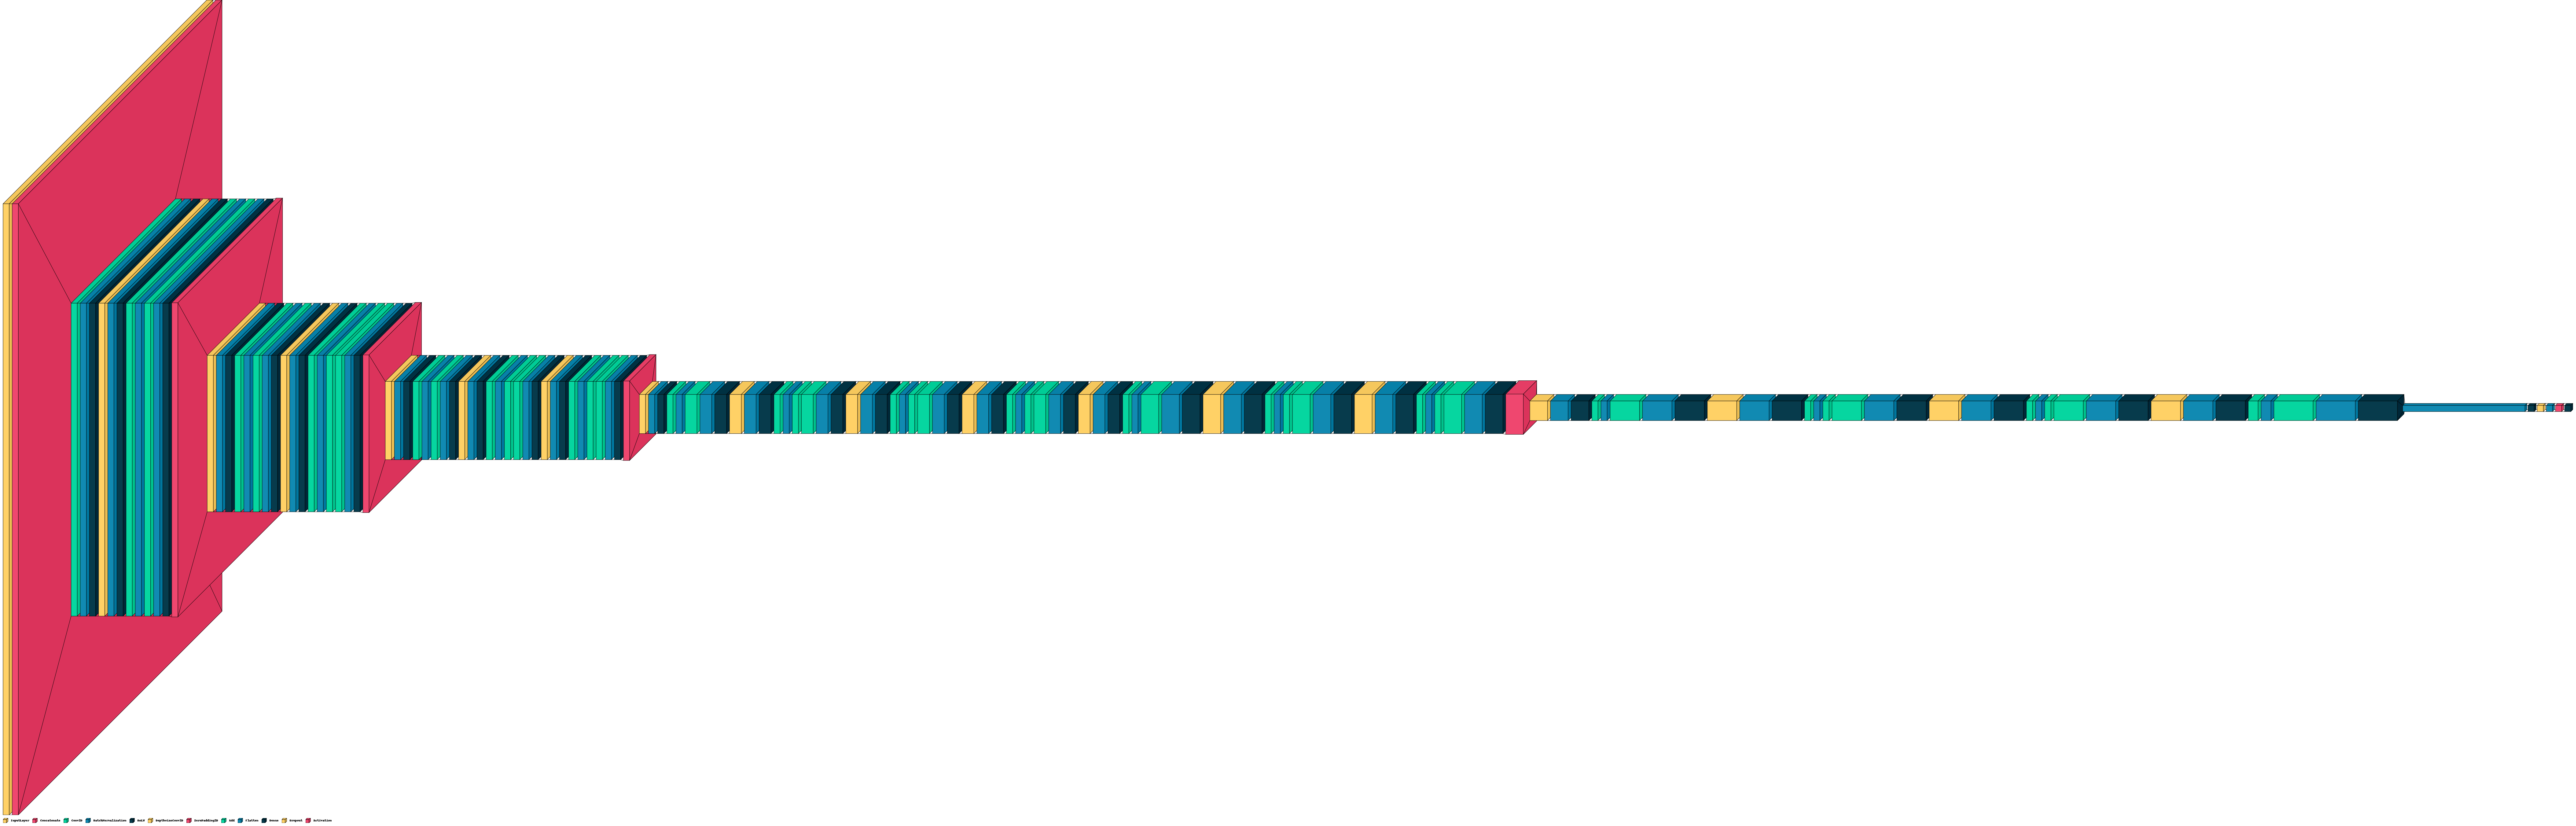

In [19]:
import visualkeras
visualkeras.layered_view(model, legend=True,draw_volume=True)

In [20]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

20/20 [==============================] - 4s 171ms/step
[[1.3561707e-03 9.9591774e-01 2.7261376e-03]
 [6.8370675e-05 5.8175123e-04 9.9934989e-01]
 [7.8466597e-05 3.7443657e-05 9.9988413e-01]
 ...
 [3.3821787e-05 9.0648589e-04 9.9905974e-01]
 [2.9130373e-04 1.0002379e-04 9.9960870e-01]
 [3.1533960e-05 2.1669897e-05 9.9994683e-01]]


In [21]:
label_pred_keras = model.predict(test_images[60][None,...])
print(label_pred_keras)

1/1 [==============================] - 0s 334ms/step
[[4.2379744e-04 9.9907100e-01 5.0516840e-04]]


In [22]:
final_class = np.unravel_index(label_pred_keras.argmax(),label_pred_keras.shape)
if final_class[1] == 0:
  print("meningioma")
elif final_class[1] == 1:
  print("glioma")
else:
  print("pituitary")

glioma


In [23]:
"""model.save('MobileNetv2_tranfer.h5')"""

"model.save('MobileNetv2_tranfer.h5')"

In [24]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [25]:
"""!cp "/content/MobileNetv2_tranfer.h5" "/content/drive/MyDrive/Final_year_project/Pri/""""

SyntaxError: ignored

In [26]:
from sklearn.metrics import f1_score,confusion_matrix,roc_curve, roc_auc_score,accuracy_score,precision_score,recall_score

In [27]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

20/20 [==============================] - 3s 174ms/step
[[1.3561707e-03 9.9591774e-01 2.7261376e-03]
 [6.8370675e-05 5.8175123e-04 9.9934989e-01]
 [7.8466597e-05 3.7443657e-05 9.9988413e-01]
 ...
 [3.3821787e-05 9.0648589e-04 9.9905974e-01]
 [2.9130373e-04 1.0002379e-04 9.9960870e-01]
 [3.1533960e-05 2.1669897e-05 9.9994683e-01]]


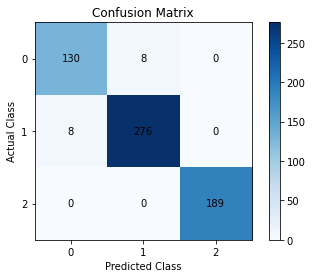

In [28]:
Pred_Label = np.argmax(label_pred_keras, axis=1)
ConfusionM = confusion_matrix(list(test_labels), Pred_Label, labels=[0, 1, 2])
plt.imshow(ConfusionM, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.xticks(np.arange(ConfusionM.shape[1]))
plt.yticks(np.arange(ConfusionM.shape[0]))
plt.grid(False)

for i in range(ConfusionM.shape[0]):
    for j in range(ConfusionM.shape[1]):
        plt.text(j, i, ConfusionM[i, j], ha='center', va='center', color='black')

plt.show()

In [30]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, Pred_Label)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, Pred_Label, average = 'macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, Pred_Label, average = 'macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, Pred_Label, average = 'macro')
print('F1 score: %f' % f1)

Accuracy: 0.973813
Precision: 0.971287
Recall: 0.971287
F1 score: 0.971287
